# Import Libraries

In [7]:
import pandas as pd #for reading data
import numpy as np #for creating multidimensional arrays
import matplotlib.pyplot as plt #visualization purpose
import seaborn as sns #visualization purpose with statistical concept
%matplotlib inline

# Get the data

In [8]:
df = pd.read_csv('kyphosis.csv') #kyphosis is a backbone disease

In [9]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# EDA

We'll just check out a simple pairplot for this small dataset.

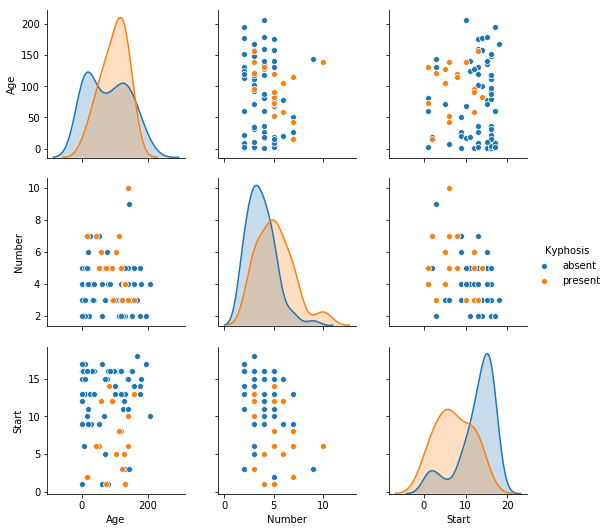

In [11]:
sns.pairplot(df,hue='Kyphosis') #hue is the output (Y) parameter

# Train Test Split

Let's split up the data into a training set and a test set!

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('Kyphosis',axis=1) #axis = 1 for columns
Y = df['Kyphosis']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30)

# Decision Trees

Training a single decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree_model = DecisionTreeClassifier(criterion = 'entropy') #by default criterion is gini_coefficient

In [19]:
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction and Evaluation


Let's evaluate our decision tree.

In [20]:
Y_pred =  tree_model.predict(X_test) #model is applied on test data and output is stored in Y_pred

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

In [23]:
conf_matrix, accuracy

(array([[18,  3],
        [ 4,  0]], dtype=int64), 0.72)

In [24]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      absent       0.82      0.86      0.84        21
     present       0.00      0.00      0.00         4

   micro avg       0.72      0.72      0.72        25
   macro avg       0.41      0.43      0.42        25
weighted avg       0.69      0.72      0.70        25



In [28]:
print(confusion_matrix(Y_test, Y_pred))

[[18  3]
 [ 4  0]]


# Tree Visualization


Scikit learn actually has some built-in visualization capabilities for decision trees, 
you won't use this often and it requires you to install the pydot library, 
but here is an example of what it looks like and the code to execute this:

In [19]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot #before running this, in anaconda command prompt type 'conda install pydot'

X_features = list(df.columns[1:]) #DT will be applied on all the independent variables
X_features

['Age', 'Number', 'Start']

In [22]:
dot_data = StringIO() #will be used to specify the location where DT will be displayed

#specifying the parameters to display the decision tree
#export_graphviz(model name ,location of DT ,column names, DT colour , DT box shape)
export_graphviz(tree_model, out_file=dot_data, feature_names=X_features, filled = True,rounded=True)

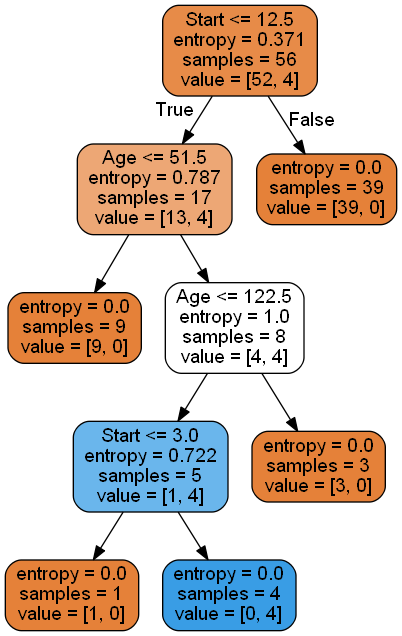

In [23]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  #dot_data have the output of graph
#graph_from_dot_data is an inbuild function of pydot
Image(graph[0].create_png()) #saving the image as .png file